In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
startup=pd.read_csv("C:\\ExcelR\\Assignments\\Assignment 5\\50_Startups.csv")

In [3]:
startup.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
le=LabelEncoder()
startup.iloc[:,3]=le.fit_transform(startup.iloc[:,3])

Correlation Matrix

In [7]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


for our convenience here we are changing columns name

In [8]:
startup.rename(columns={'R&D Spend':'RNDS','Marketing Spend':'MSP','Administration':'ADM','State':'St'},inplace=True)

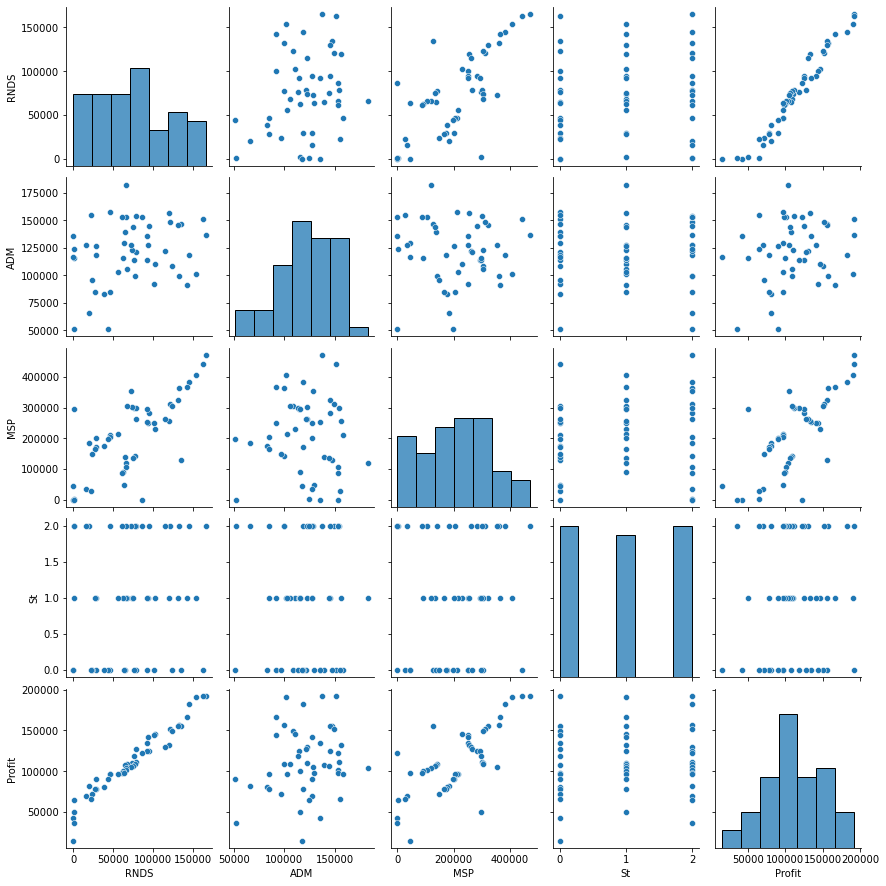

In [9]:
# Scatter plots
sns.pairplot(startup)

now we will build our model 

In [10]:
model=smf.ols('Profit~RNDS+ADM+MSP+St',data=startup).fit()

In [11]:
model.params

Intercept    50142.506443
RNDS             0.805760
ADM             -0.026826
MSP              0.027228
St             -22.320577
dtype: float64

In [12]:
model.pvalues

Intercept    2.900008e-09
RNDS         8.249206e-22
ADM          6.056771e-01
MSP          1.086131e-01
St           9.889988e-01
dtype: float64

In [13]:
print('R^2:',np.round(model.rsquared,5),'   ','R^2_adj:',np.round(model.rsquared_adj,5))

R^2: 0.95075     R^2_adj: 0.94637


as our pvalues for ADM, MSP and St are hight which means they are insignificant. Therefore we will try to optimize them.

In [14]:
#for Administration 
mod_A=smf.ols('Profit~ADM',data=startup).fit()
print(mod_A.tvalues,'\n',mod_A.pvalues)

Intercept    3.040044
ADM          1.419493
dtype: float64 
 Intercept    0.003824
ADM          0.162217
dtype: float64


In [15]:
#for Marketing spend
mod_M=smf.ols('Profit~MSP',data=startup).fit()
print(mod_M.tvalues,'\n',mod_M.pvalues)

Intercept    7.808356
MSP          7.802657
dtype: float64 
 Intercept    4.294735e-10
MSP          4.381073e-10
dtype: float64


In [16]:
#for State 
mod_S=smf.ols('Profit~St',data=startup).fit()
print(mod_S.tvalues,'\n',mod_S.pvalues)

Intercept    11.891440
St            0.708948
dtype: float64 
 Intercept    6.485443e-16
St           4.817858e-01
dtype: float64


For more info we will calculate VIF 

In [17]:
rsq_ADM = smf.ols('ADM~RNDS+MSP+St',data=startup).fit().rsquared  
VIF_ADM = 1/(1-rsq_ADM)

rsq_MSP=smf.ols('MSP~RNDS+ADM+St',data=startup).fit().rsquared  
VIF_MSP=1/(1-rsq_MSP)

rsq_St=smf.ols('St~RNDS+ADM+MSP',data=startup).fit().rsquared  
VIF_St=1/(1-rsq_St)

rsq_RNDS=smf.ols('RNDS~ADM+MSP+St',data=startup).fit().rsquared  
VIF_RNDS=1/(1-rsq_RNDS)

In [18]:
data={'Regressor':['ADM','MSP','St','RNDS'],'VIF':[VIF_ADM,VIF_MSP,VIF_St,VIF_RNDS],'R_sq':[rsq_ADM,rsq_MSP,rsq_St,rsq_RNDS]}
VIF_rsq=pd.DataFrame(data)
VIF_rsq

,Regressor,VIF,R_sq
0,ADM,1.175315,0.149165
1,MSP,2.326780,0.570222
2,St,1.011281,0.011155
3,RNDS,2.481178,0.596966


here none of regressor have VIF score greater than 20 therefore we will keep all the regressor in our model

Now residual analysis

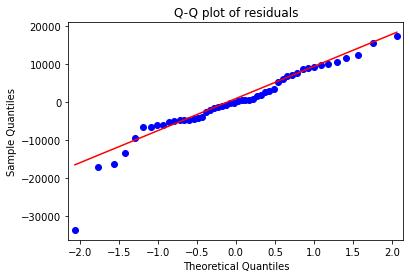

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Q-Q plot of residuals")
plt.show()

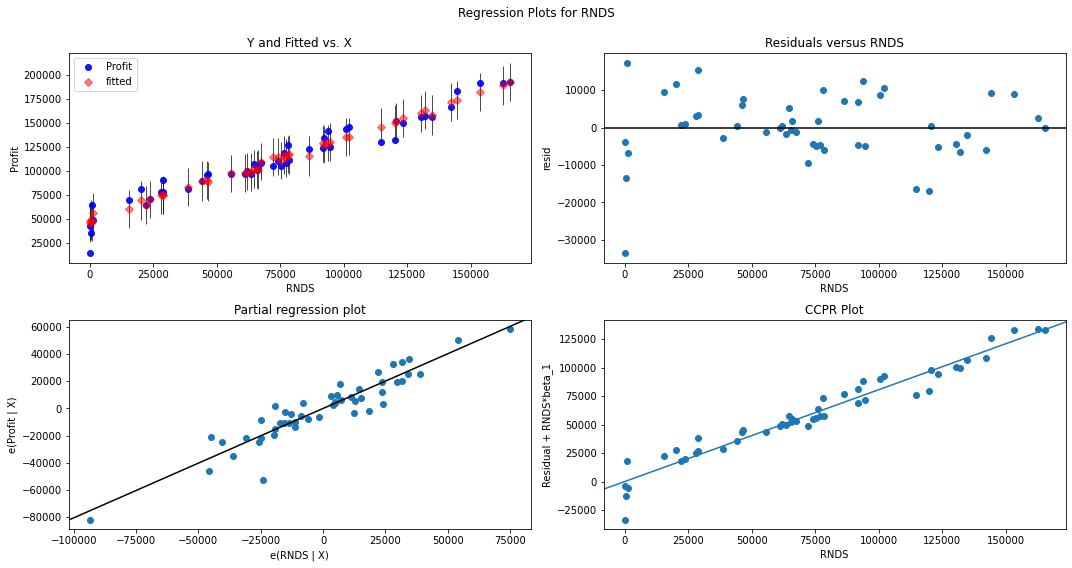

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RNDS", fig=fig)
plt.show()

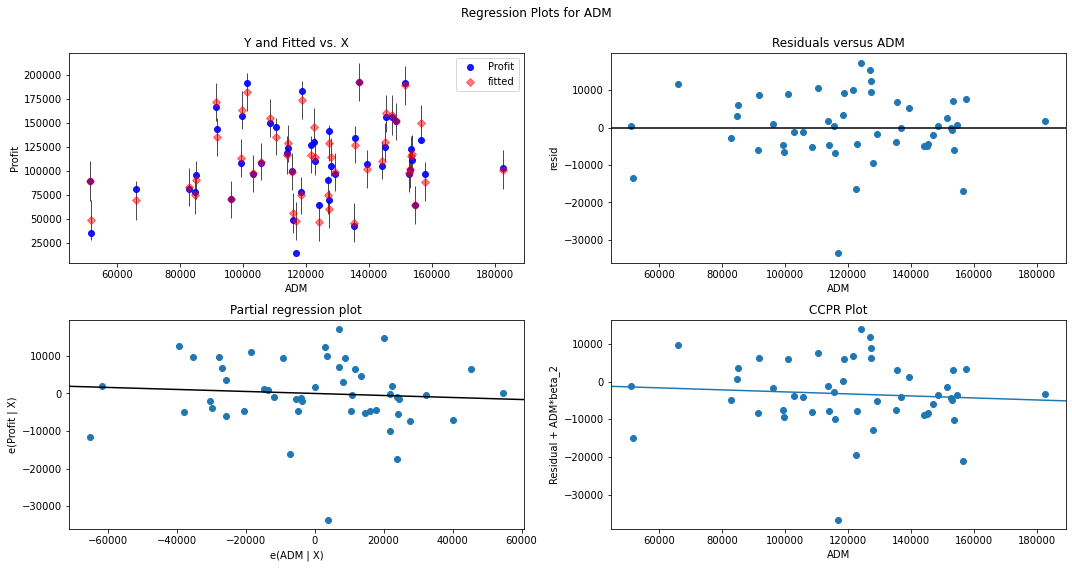

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADM", fig=fig)
plt.show()

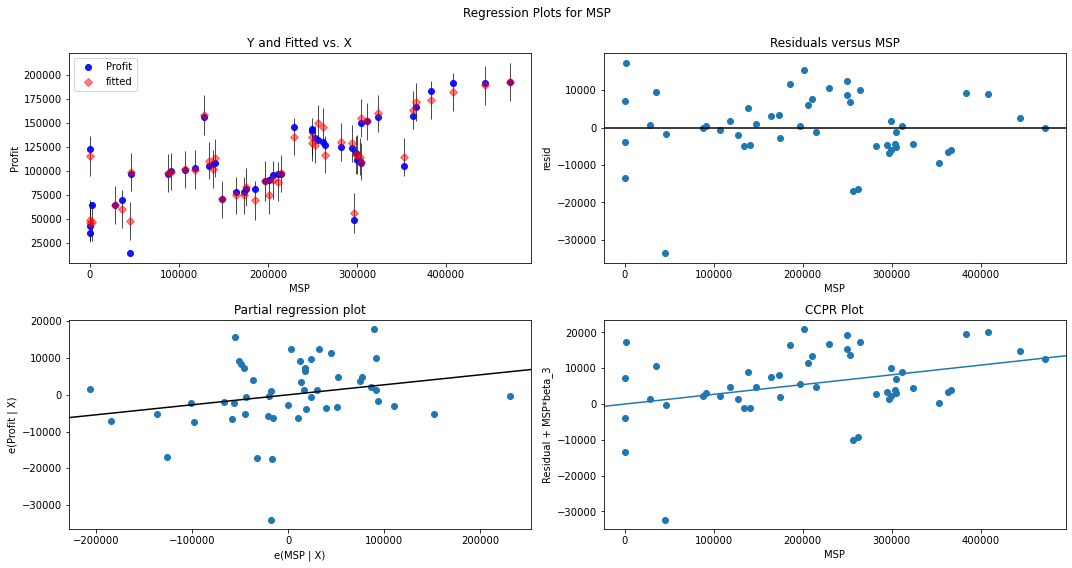

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MSP", fig=fig)
plt.show()

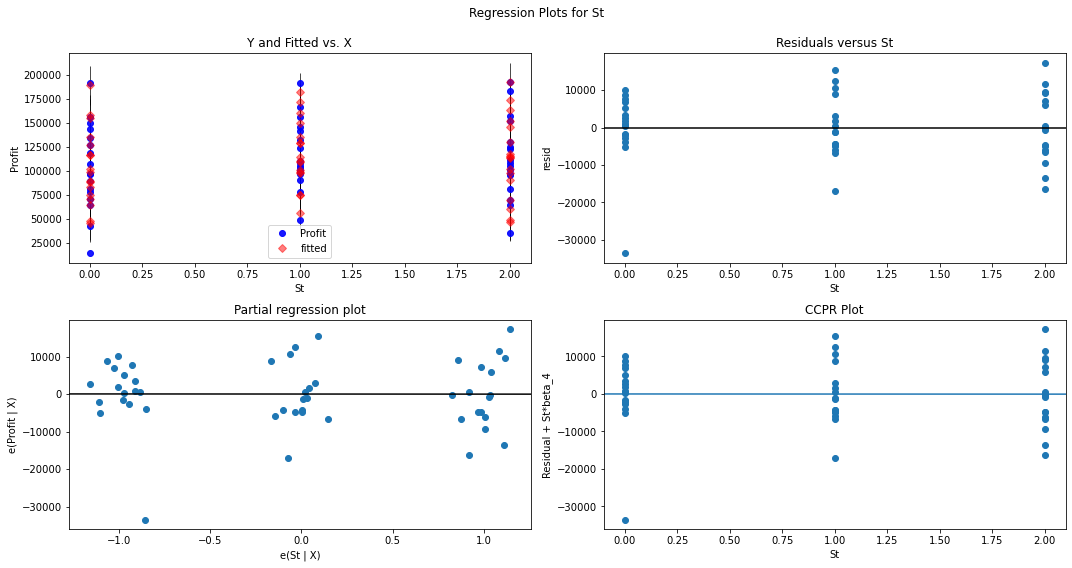

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "St", fig=fig)
plt.show()

In [24]:
#final model
model_f=smf.ols('Profit~RNDS+ADM+MSP+St',data=startup).fit()

In [25]:
# Coefficient of model
model_f.params

Intercept    50142.506443
RNDS             0.805760
ADM             -0.026826
MSP              0.027228
St             -22.320577
dtype: float64

In [26]:
print(model_f.tvalues,'\n',model_f.pvalues)

Intercept     7.368962
RNDS         17.608621
ADM          -0.519906
MSP           1.636966
St           -0.013865
dtype: float64 
 Intercept    2.900008e-09
RNDS         8.249206e-22
ADM          6.056771e-01
MSP          1.086131e-01
St           9.889988e-01
dtype: float64


Now, we will try to predict the value of profit(y)

In [27]:
data={'RNDS':[120699,56894,94568],'ADM':[178456,548629,158745],'MSP':[723594,258569,1023569],'St':[3,2,3]}

In [28]:
pred=pd.DataFrame(data)

In [29]:
pred

,RNDS,ADM,MSP,St
0,120699,178456,723594,3
1,56894,548629,258569,2
2,94568,158745,1023569,3


In [30]:
model_f.predict(pred)

0    162244.475701
1     88263.547238
2    149885.554043
dtype: float64

In [31]:
print('R^2:',np.round(model_f.rsquared,5),'   ','R^2_adj:',np.round(model_f.rsquared_adj,5))

R^2: 0.95075     R^2_adj: 0.94637
